# Exercise 1 - Wine Classification

First of all, some imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
import seaborn as sns
sns.set_theme(style='darkgrid')

Then, let's import the dataset from scikit-learn's dataset

In [2]:
from sklearn.datasets import load_wine

In [3]:
dataset = load_wine()
X = dataset['data']
y = dataset['target']
feature_names = dataset['feature_names']

## Exploratory analysis

Quickly explore the dataset using pandas to check for nulls, dtypes, and the distributions

In [4]:
pd.DataFrame(X).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    float64
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    float64
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
dtypes: float64(13)
memory usage: 18.2 KB


In [5]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>],
       [<AxesSubplot:title={'center':'12'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

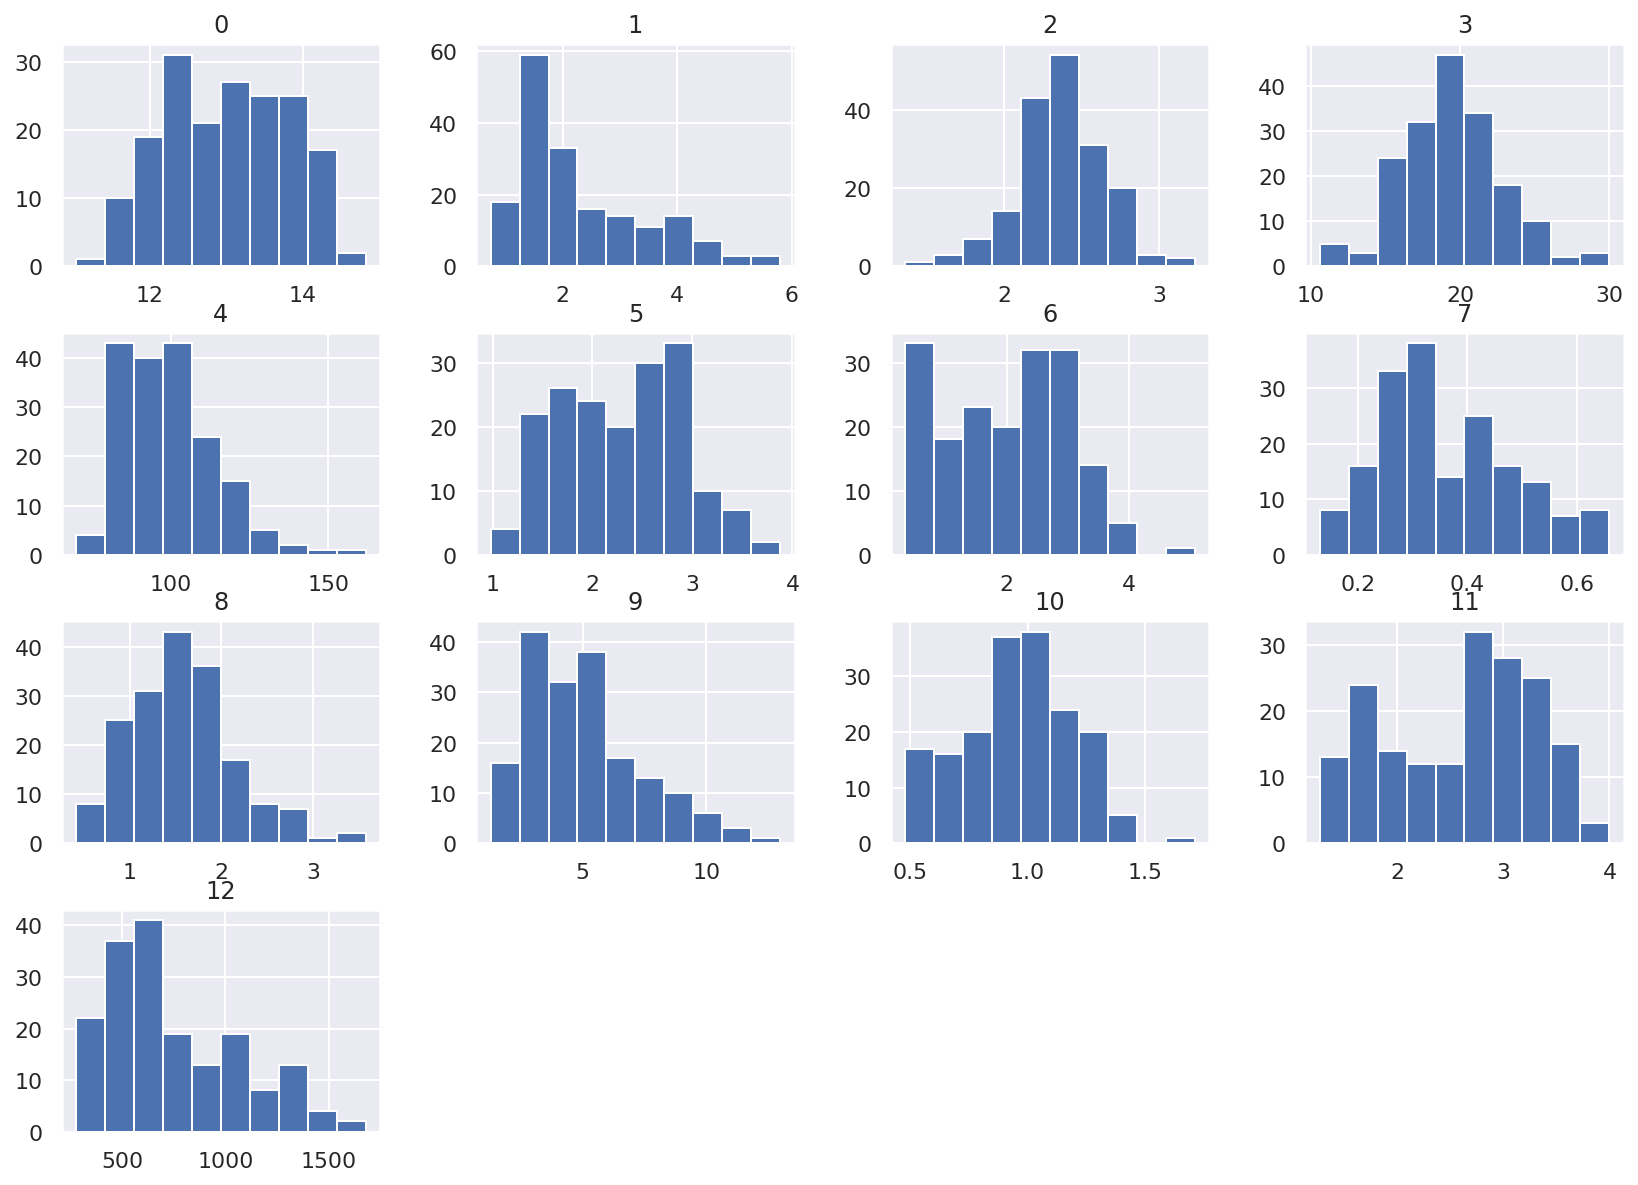

In [6]:
pd.DataFrame(X).hist(figsize=(14, 10))

We can see how we have a small dataset: 178 rows with 12 columns. No missing values, no NaNs.

All of the features have "reasonable" values although they are not standardized. We plan on using a decision tree classifier so, given this data, no preprocessing seems to be necessary.

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [8]:
pd.Series(y).value_counts()

1    71
0    59
2    48
dtype: int64

We can also see that the classes are balanced enough

## Building a classifier

In [9]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

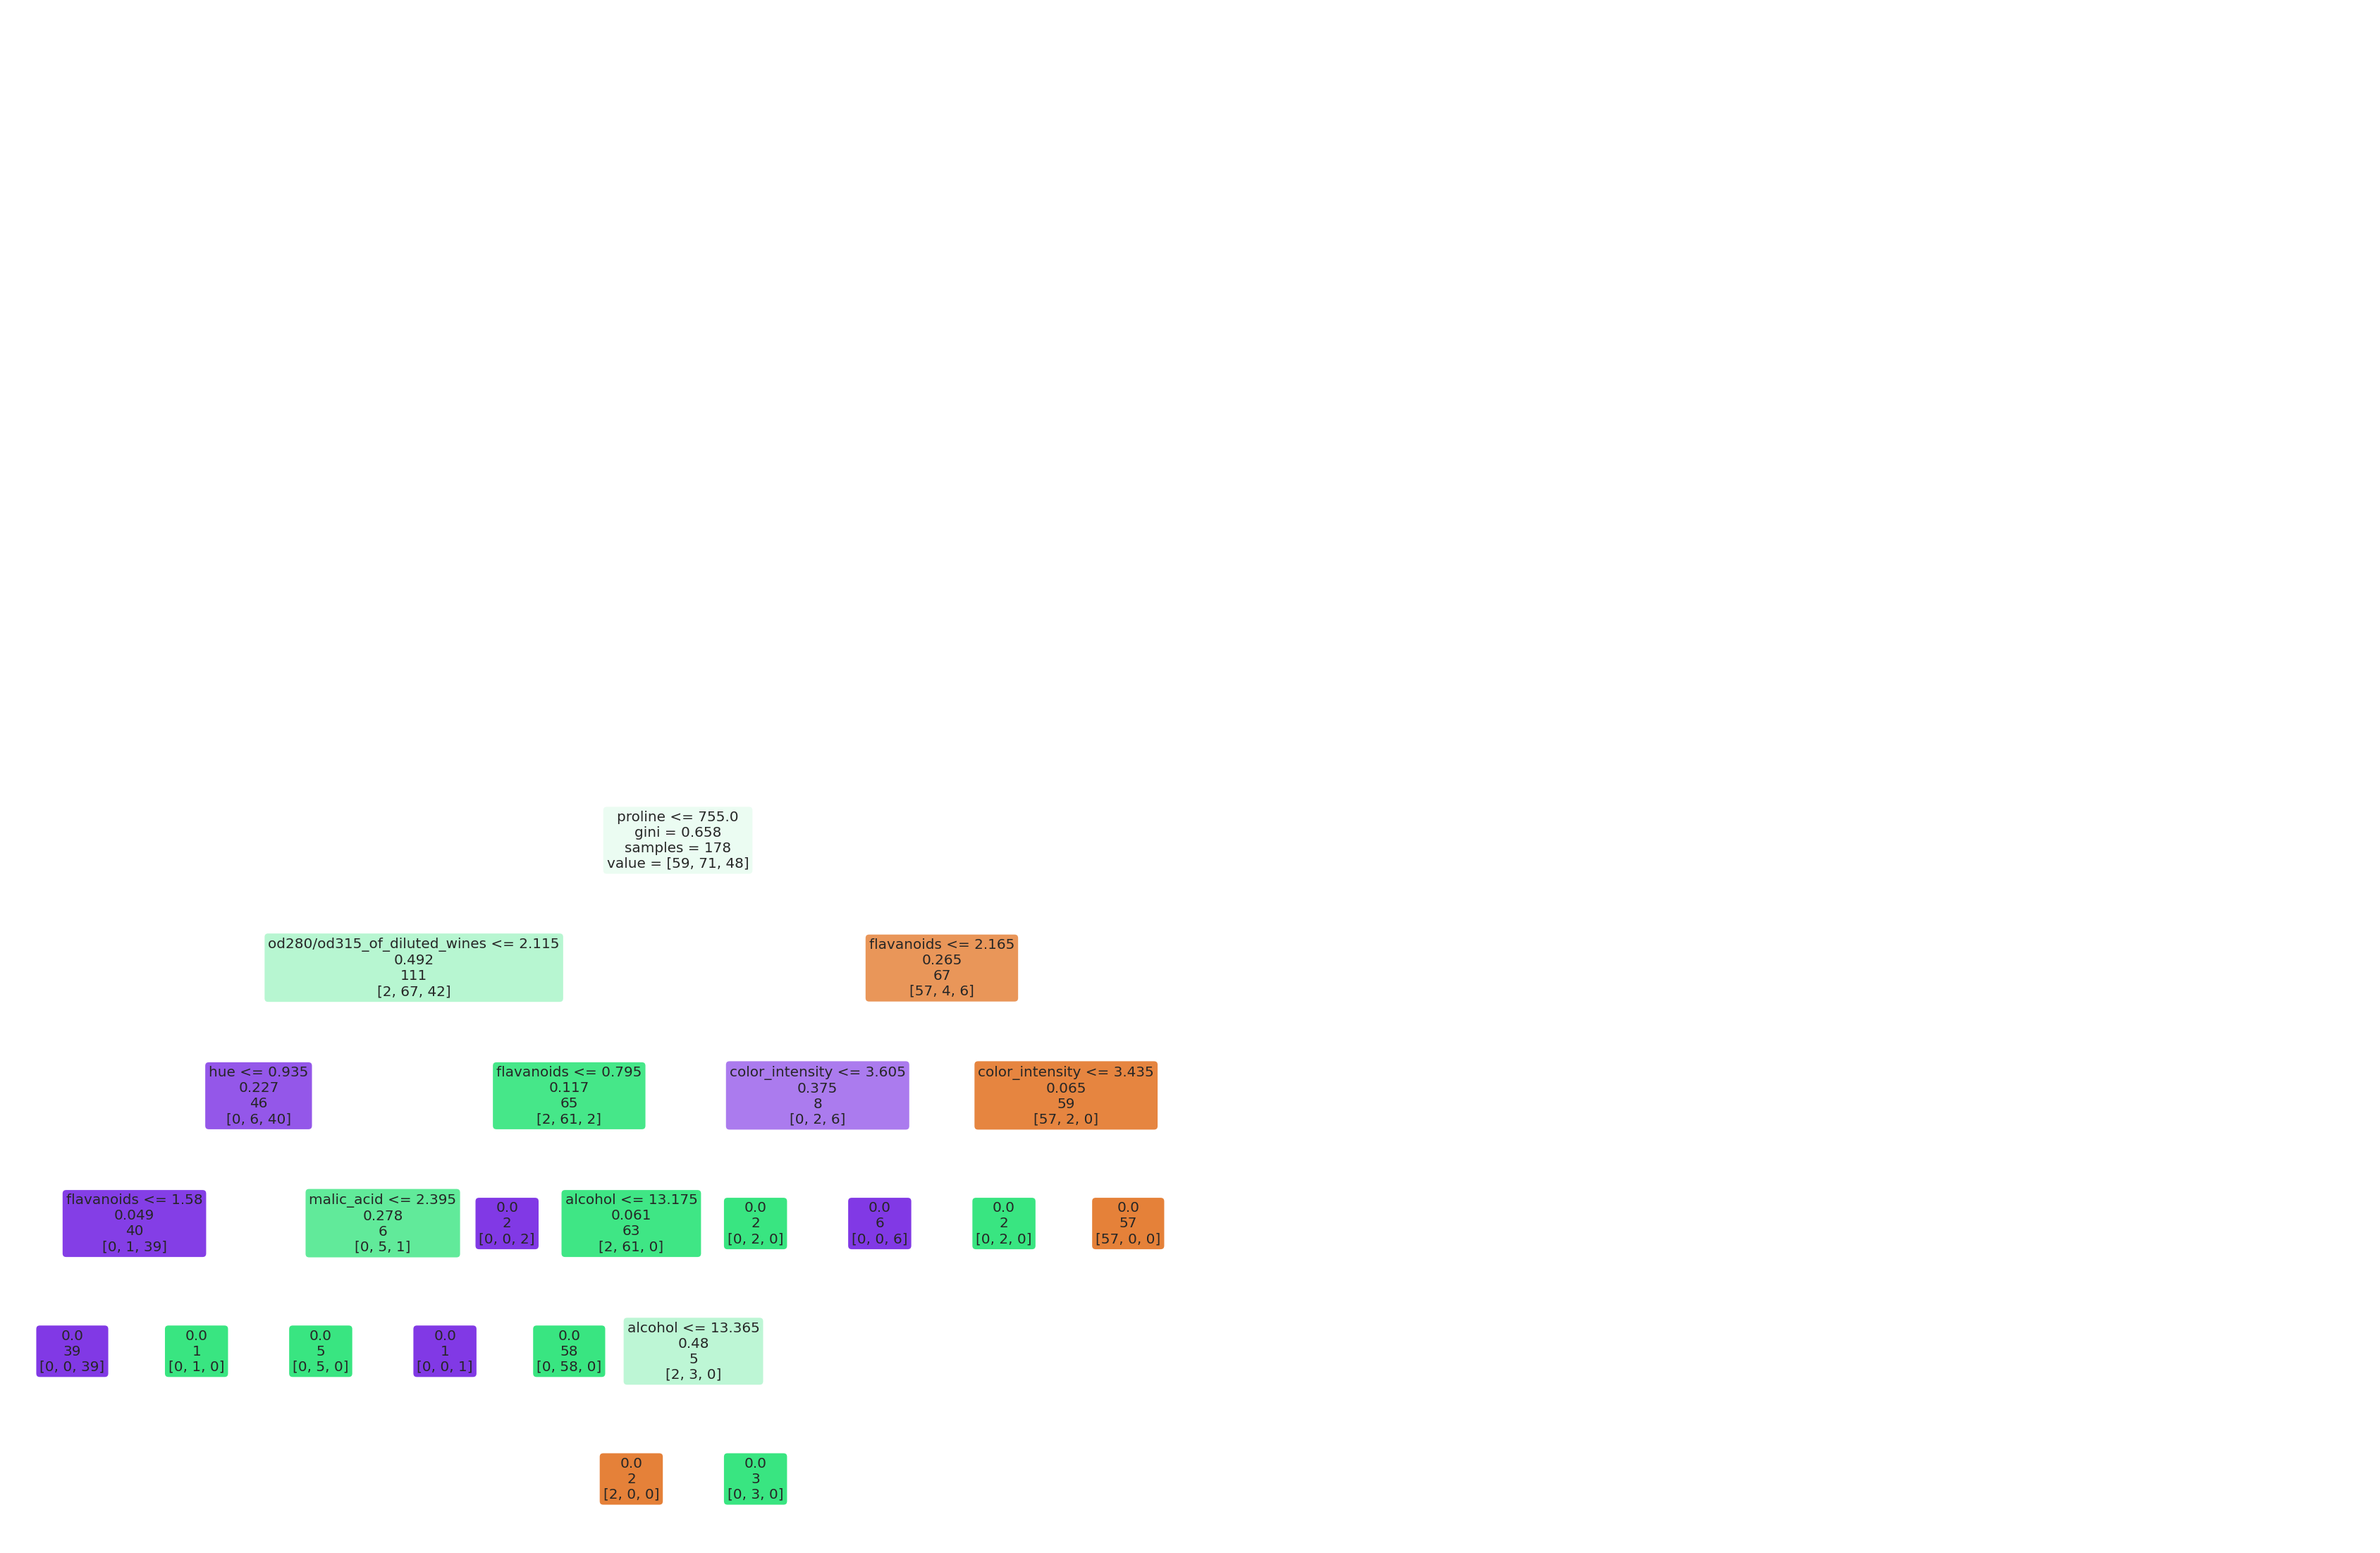

In [11]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(30,20))
plot_tree(clf, filled=True, feature_names=feature_names, rounded=True, ax=ax, label='root', fontsize=10);

## Evaluation

In [12]:
from sklearn.metrics import accuracy_score

Unsurprisingly, when training on the whole dataset and then testing on it, we obtain a perfect accuracy score. Almost surely this is due to some level of overfitting.

In [14]:
accuracy_score(y, clf.predict(X))

1.0

## Train/Test splitting

In [15]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

We still get a good accuracy on our test set, but not the 1.0 we got before.

In [23]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))

0.9444444444444444

Notice how we still fit perfectly our training dataset, decision trees are a very flexible model.

In [22]:
accuracy_score(y_train, clf.predict(X_train))

1.0

We can see that all classes have similar precision/recall/f1-score across all classes, the model seems to behave well.

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



## Grid Search

Possible parameters

```python
criterion='gini',
splitter='best',
max_depth=None,
min_samples_split=2,
min_samples_leaf=1,
min_weight_fraction_leaf=0.0,
max_features=None,
random_state=None,
max_leaf_nodes=None,
min_impurity_decrease=0.0,
min_impurity_split=None,
class_weight=None,
presort='deprecated',
ccp_alpha=0.0,
```

In [44]:
from sklearn.model_selection import ParameterGrid

params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 2, 4, 6, 8],
    "splitter": ["best", 'random']
}

results = []
for config in ParameterGrid(params):
    clf = DecisionTreeClassifier(**config)
    clf.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    results.append((config, acc))

for config,acc in sorted(results, key=lambda a: a[1], reverse=True):
    print(config, f"{acc:.3f}")

{'criterion': 'gini', 'max_depth': 6, 'splitter': 'random'} 0.972
{'criterion': 'gini', 'max_depth': None, 'splitter': 'best'} 0.944
{'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'} 0.944
{'criterion': 'gini', 'max_depth': 6, 'splitter': 'best'} 0.944
{'criterion': 'gini', 'max_depth': 8, 'splitter': 'best'} 0.944
{'criterion': 'gini', 'max_depth': 8, 'splitter': 'random'} 0.944
{'criterion': 'entropy', 'max_depth': 6, 'splitter': 'random'} 0.944
{'criterion': 'entropy', 'max_depth': None, 'splitter': 'best'} 0.917
{'criterion': 'entropy', 'max_depth': None, 'splitter': 'random'} 0.917
{'criterion': 'entropy', 'max_depth': 2, 'splitter': 'best'} 0.917
{'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'} 0.917
{'criterion': 'entropy', 'max_depth': 4, 'splitter': 'random'} 0.917
{'criterion': 'entropy', 'max_depth': 6, 'splitter': 'best'} 0.917
{'criterion': 'entropy', 'max_depth': 8, 'splitter': 'best'} 0.917
{'criterion': 'gini', 'max_depth': None, 'splitter': 'random'

## K-fold Cross Validation

We are using the test set to evaluate our grid search. This means that we could be overfitting our test set. A better approach would be to split into train/validation/test, then learn our parameters on the training set, learn our hyperparameters on the validation set, and finally evaluate the model on the test set.

This requires splitting the dataset into 3 subsets. Another approach would be to use K-fold cross validation on the training set and learn the parameters on the k-1 folds, while learning the hyperparameters in the 1 remaining fold.

In [45]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [46]:
from sklearn.model_selection import KFold
kf = KFold(5)

In [71]:
from collections import defaultdict
results = defaultdict(list)
for train_ixs, validation_ixs in kf.split(X_train_valid, y_train_valid):
    X_train = X_train_valid[train_ixs]
    X_valid = X_train_valid[validation_ixs]
    y_train = y_train_valid[train_ixs]
    y_valid = y_train_valid[validation_ixs]

    for config in ParameterGrid(params):
        clf = DecisionTreeClassifier(**config)
        clf.fit(X_train, y_train)
        acc = accuracy_score(y_test, clf.predict(X_test))
        results[str(config)].append(acc)
        
for config, accuracies in results.items():
    results[config] = np.average(accuracies)
    
sorted(results.items(), key=lambda r:r[1], reverse=True)

[("{'criterion': 'gini', 'max_depth': None, 'splitter': 'best'}",
  0.961111111111111),
 ("{'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}", 0.95),
 ("{'criterion': 'gini', 'max_depth': 6, 'splitter': 'best'}", 0.95),
 ("{'criterion': 'gini', 'max_depth': 8, 'splitter': 'best'}", 0.95),
 ("{'criterion': 'gini', 'max_depth': None, 'splitter': 'random'}",
  0.9388888888888889),
 ("{'criterion': 'entropy', 'max_depth': 8, 'splitter': 'best'}",
  0.9333333333333332),
 ("{'criterion': 'gini', 'max_depth': 4, 'splitter': 'random'}",
  0.9277777777777777),
 ("{'criterion': 'entropy', 'max_depth': 2, 'splitter': 'best'}",
  0.9277777777777777),
 ("{'criterion': 'entropy', 'max_depth': 6, 'splitter': 'best'}",
  0.9277777777777777),
 ("{'criterion': 'entropy', 'max_depth': 4, 'splitter': 'random'}",
  0.9222222222222223),
 ("{'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}",
  0.9222222222222222),
 ("{'criterion': 'entropy', 'max_depth': None, 'splitter': 'random'}",
  0.9

In [72]:
best_model = sorted(results.items(), key=lambda r:r[1], reverse=True)[0][0]
best_model

"{'criterion': 'gini', 'max_depth': None, 'splitter': 'best'}"

In [73]:
clf = DecisionTreeClassifier(**{'criterion': 'gini', 'max_depth': None, 'splitter': 'best'})
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))

1.0